# Gradient descent principles

## Gradient descent methods 

### A simple quadratic function

First of all we define the gradient of the function that is going to be studied:

In [44]:
def grad_quad_function(point):
    return 2*point

Given an initial point, our aim is to try and find the minimum by performing a descent guided by the gradient calculated after each iteration:

$$x^{k+1}= x^k - \alpha^k \nabla f(x^k)$$

Therefore, what we do is define a function named *grad_desc* that takes the gradient of a function and performs a gradient descent given an initial point, a constant alpha and a number of iterations:

In [94]:
import pandas as pd
point = pd.Series([0,5])

def grad_desc(fun,point, max_iter = 101,alpha = 0.1): # max_iter=101 coz range() stops at max_iter-1
    x = []
    for i in range(0,max_iter):
        x.append(point.tolist())
        point = point - alpha*fun(point)
    return x

Now, let's see how different starting points eventually find the minimum and let's draw them. Our parameters are: \

Number of iterations: 100.\
Steps $\alpha^k$: 0.1, 0.9, 1, 1.1 and 2. \
Starting points $x^0$: (0, 50), (50, -50) and (-75, 0).
 

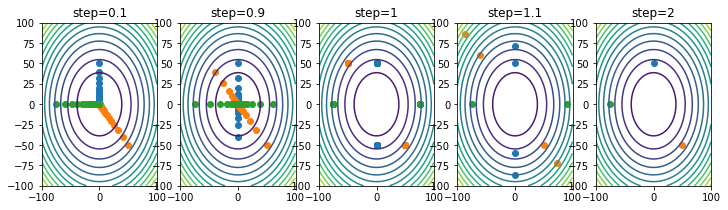

In [95]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np


# Function to analyze

x = np.arange(-100,100,0.5)
y = np.arange(-100,100,0.5)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 

# Vector of steps to use
steps = [0.1, .9, 1, 1.1, 2]

# List to record all the paths
paths = []

# Loop for computing and plotting paths
plt.figure(figsize=(12, 3))
for i, stepi in enumerate(steps):
    descents = []
    descents.append(grad_desc(grad_quad_function,pd.Series([0,50]), alpha=stepi))
    descents.append(grad_desc(grad_quad_function,pd.Series([50,-50]), alpha=stepi))
    descents.append(grad_desc(grad_quad_function,pd.Series([-75,0]), alpha=stepi))
    paths.append(descents)
    
    subpl = "1" + str(len(steps)) + str(i+1)  
    plt.subplot(subpl)
    plt.title("step=" + str(stepi))
    plt.axis([-100,100,-100,100]) #have to put this right before a given plot for it to work
    #plt.axis('equal')#-> leaves part of the frame of the figure blank, so I commented it out
    plt.contour(X, Y, Z, 15)

    # Different points plot: el método de antes no estaba dibujando los puntos del grad desc, 
    # pq plt no admite datos en ese formato. Hay que ponerlos en plan:
    # "lista_con_coords_x, lista_con_coords_y", y "zip" parece funcionar pa eso (merci Stack Overflow XD).

    # Además, como me parece interesante plotear puntos en vez de líneas por ver cómo evolu-
    #ciona el algoritmo (se ve que los pasos son más pequeños según se acerca, pq el grad 
    # tiende a 0), he cambiado "plpt" por "scatter".

    plt.scatter(*zip(*descents[0]))   
    plt.scatter(*zip(*descents[1]))
    plt.scatter(*zip(*descents[2]))
    #plt.plot(descents[0][0],descents[0][1])
    #plt.plot(descents[1][0],descents[1][1])
    #plt.plot(descents[2][0],descents[2][1])


#plt.axis('equal')
plt.show()



We observe in the figures above (where different colours represent the path from the three different starting points) that the method does converge to the analytically-known minimun (0,0) for $\alpha^k<1$ (although the order of the points is not obvious from the plots, we have trivially verified such is the case from the list "paths", where we record the paths for every step size and from every initial point).
\
For $\alpha^k>=1$, however, we already see in the gradient descent formula that, given the specific gradient of our function, the algorithm cannot ever converge. Indeed, as soon as $\alpha^k=1$, the algorithm will just take the opposite of the initial point in the direction of the gradient, constantly shifting between $x^0$ and $-x^0$, and if $\alpha^k>1$ each inversion will take us ever further away from the minimum (as can be seen from the plots, and we have verified in "paths").\
From the above discussion, we confirm that for (and only for) $\alpha^k<1$ the algorithm converges to the minimum within a given precision, and that the more iterations we perform, the closer we get to such a point, because even if a new point surpasses it, it will invariably be nearer to it than its predecessor. 

### A more complex function

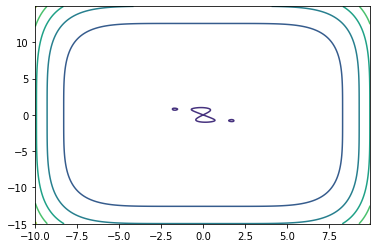

In [102]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Function to analyze

X = np.arange(-10, 10, 0.05)
Y = np.arange(-15, 15, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2*(4-2.1*X**2 + 1/3*X**4) + X*Y + Y**2*(-4 + 4*Y**2) 

# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 5)
plt.show()

### The Rosenbrock function

## Newton descent method

### A simple quadratic function

### A more complex function

### The Rosenbrock function